# Importing libraries

In [1]:
import twint
import pandas as pd
import nest_asyncio
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from datetime import datetime, timedelta, date

# Defining function to scrape tweets of user

In [2]:
def scraper(user, days):
    nest_asyncio.apply()
    
    c = twint.Config()
    
    #c.Search = '#'
    c.Username = user
    c.Hide_output = True
    #c.Limit = 20
    c.Pandas = True
    c.Since = '{:%Y-%m-%d %H:%M:%S}'.format(datetime.today() - timedelta(days = days))
    c.Lang = 'en'
    
    twint.run.Search(c)
    df = twint.storage.panda.Tweets_df
    
    return df[cols]

# Scraping Trump's 1 year tweets
Saved information: tweet, date of tweet and if retweet

In [3]:
follow = 'realDonaldTrump'
cols = ['tweet', 'date', 'retweet']

df = pd.DataFrame(columns = cols)
df = pd.concat([df, scraper(follow, 365)])
df = df.sort_values('date', ascending = False)

CRITICAL:root:twint.get:User:'NoneType' object is not subscriptable


# Output verification

In [4]:
df.head()

,tweet,date,retweet
0,"Exclusive: Zach Fuentes, Top Aide to John Kell...",2020-09-07 22:19:56,False
1,Biggest & Fastest Financial Recovery In Histor...,2020-09-07 21:54:30,False
2,Just heard that Wacko John Bolton was talking ...,2020-09-07 21:14:54,False
3,"Rochester N.Y., Brooklyn N.Y., Portland - All ...",2020-09-07 19:39:29,False
4,"10.6 Million Jobs Created In Just 4 Months, A ...",2020-09-07 19:32:09,False


In [5]:
print(df['tweet'][6])
print(df['tweet'][17])

Gordon Chang: China Seems ‘to Be Favoring Joe Biden‘ in Presidential Election  https://www.breitbart.com/clips/2020/09/06/gordon-chang-china-seems-to-be-favoring-joe-biden-in-presidential-election/ … via @BreitbartNews. Of course they want Biden. I have taken $Billions from China and given it to our Farmers and U.S. Treasury. China would own the U.S. if Biden & Hunter got in!
Steve Jobs would not be happy that his wife is wasting  money he left her on a failing Radical Left Magazine that is run by a con man (Goldberg) and spews FAKE NEWS & HATE. Call her, write her, let her know how you feel!!! https://twitter.com/charliekirk11/status/1301946633458860033 …


# Removing hyperlinks from tweets

In [6]:
df['tweet'] = df['tweet'].apply(lambda tweet: re.sub(r"http\S+", "", tweet))
df['tweet'] = df['tweet'].apply(lambda tweet: re.sub(r"pic.twitter.com\S+", "", tweet))

# Verifying removed hyperlinks

In [7]:
print(df['tweet'][6])
print(df['tweet'][17])

Gordon Chang: China Seems ‘to Be Favoring Joe Biden‘ in Presidential Election   … via @BreitbartNews. Of course they want Biden. I have taken $Billions from China and given it to our Farmers and U.S. Treasury. China would own the U.S. if Biden & Hunter got in!
Steve Jobs would not be happy that his wife is wasting  money he left her on a failing Radical Left Magazine that is run by a con man (Goldberg) and spews FAKE NEWS & HATE. Call her, write her, let her know how you feel!!!  …


# Saving tweets as csv

In [8]:
df.to_csv(r'trump-tweets-1-year-(08-09-20).csv',
             index = False,
             encoding = 'utf-8-sig')

# Plotting WordCloud

In [9]:
df2 = pd.read_csv(r'trump-tweets-1-year-(08-09-20).csv')

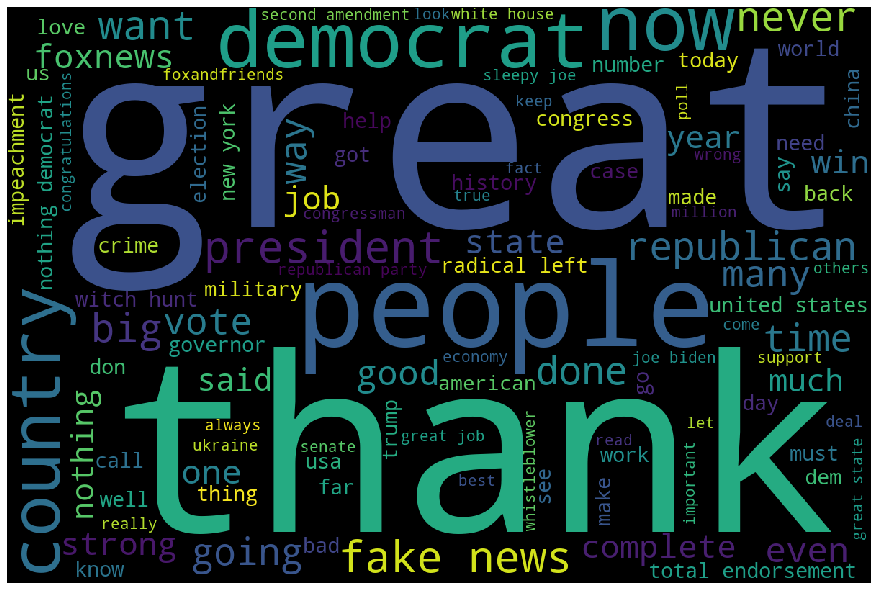

In [10]:
%matplotlib inline

word_string = ' '.join(df2['tweet'].str.lower())
stopwords = ['will'] + list(STOPWORDS)

wordcloud = WordCloud(width = 1200, height = 800,
                      background_color = 'black',
                      stopwords = stopwords,
                      min_font_size = 20).generate(word_string)

plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()